In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import re
import schedule
import time

In [12]:
# This function is used to graph and chart the stock data
def chart(stock_name):
    #Load the Data
    df = pd.read_csv(f'{stock_name}.csv')
    
    #Create a simple moving average with a 30 day window
    SMA_30 = pd.DataFrame()
    SMA_30['Adj_Close_Price'] = df['Adj Close'].rolling(window = 30).mean()
    SMA_30
    
    # Short moving average for 100 days
    SMA_100 = pd.DataFrame()
    SMA_100['Adj_close_price'] = df['Adj Close'].rolling(window = 100).mean()
    SMA_100
    
    # Create a dataframe of all adj close prices
    data = pd.DataFrame()
    data['Date'] = df['Date']
    data['AAL_adj_close'] = df['Adj Close']
    data['SMA_30'] = SMA_30['Adj_Close_Price']
    data['SMA_100']= SMA_100['Adj_close_price']
    
    #Create a Function to signal when to buy and sell
    def buy_sell(data):
        sig_price_buy = []
        sig_price_sell = []
        flag = -1

        for i in range(len(data)):
            if data['SMA_30'][i] > data['SMA_100'][i]:
                if flag != 1:
                    sig_price_buy.append(data['AAL_adj_close'][i])
                    sig_price_sell.append(np.nan)
                    flag = 1
                else:
                    sig_price_buy.append(np.nan)
                    sig_price_sell.append(np.nan)
            elif data['SMA_30'][i] < data['SMA_100'][i]:
                if flag !=0:
                    sig_price_buy.append(np.nan)
                    sig_price_sell.append(data['AAL_adj_close'][i])
                    flag = 0
                else:
                    sig_price_buy.append(np.nan)
                    sig_price_sell.append(np.nan)
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)

        return (sig_price_buy, sig_price_sell)
    
    #store the buy and sell data into a variable
    buy_sell = buy_sell(data)
    data['buy_signal_price'] = buy_sell[0]
    data['sell_signal_price']=buy_sell[1]
    
    #Looking for the dates of the buy signals
    buy_dates = data.loc[data['buy_signal_price']>0]
    
    #Looking for the dates of the sell signals
    sell_dates = data.loc[data['sell_signal_price']>0]
    
    #Dropping uneccessary columns
    buy_dates.drop(columns = ['sell_signal_price', 'SMA_30', 'SMA_100'], inplace = True)
    sell_dates.drop(columns = ['buy_signal_price', 'SMA_30', 'SMA_100'], inplace = True)
    
    # DF of dates with prices
    dates = pd.concat([buy_dates, sell_dates],sort = True)
    
    # Now to organize by the dates, drop adj_close price column, and make date the index
    dates.sort_values(by = 'Date', inplace = True)
    dates.drop(columns = ['AAL_adj_close'],inplace = True)
    dates.set_index('Date', inplace = True)

    #visualize data and strategy to buy and sell stock
    ab = plt.figure(figsize=(20,12))
    last_date = df['Date'].iloc[-1]
    first_date = df['Date'].iloc[0]
    plt.plot(data['AAL_adj_close'],label = 'PMAC', alpha = 0.35)
    plt.plot(data['SMA_30'], label = 'SMA30', alpha = 0.35)
    plt.plot(data['SMA_100'],label = 'SMA100', alpha = 0.35)
    plt.scatter(data.index, data['buy_signal_price'],label = 'Buy',marker = '^', color = 'green')
    plt.scatter(data.index, data['sell_signal_price'], label = 'Sell', marker = 'v', color = 'red')
    plt.title('{} adj close price history buy and sell signals'.format(stock_name))
    plt.xlabel('{} - {}'.format(first_date, last_date))
    plt.ylabel('Adj close price USD')
    plt.legend()
    plt.show()
    print(dates)

    return 


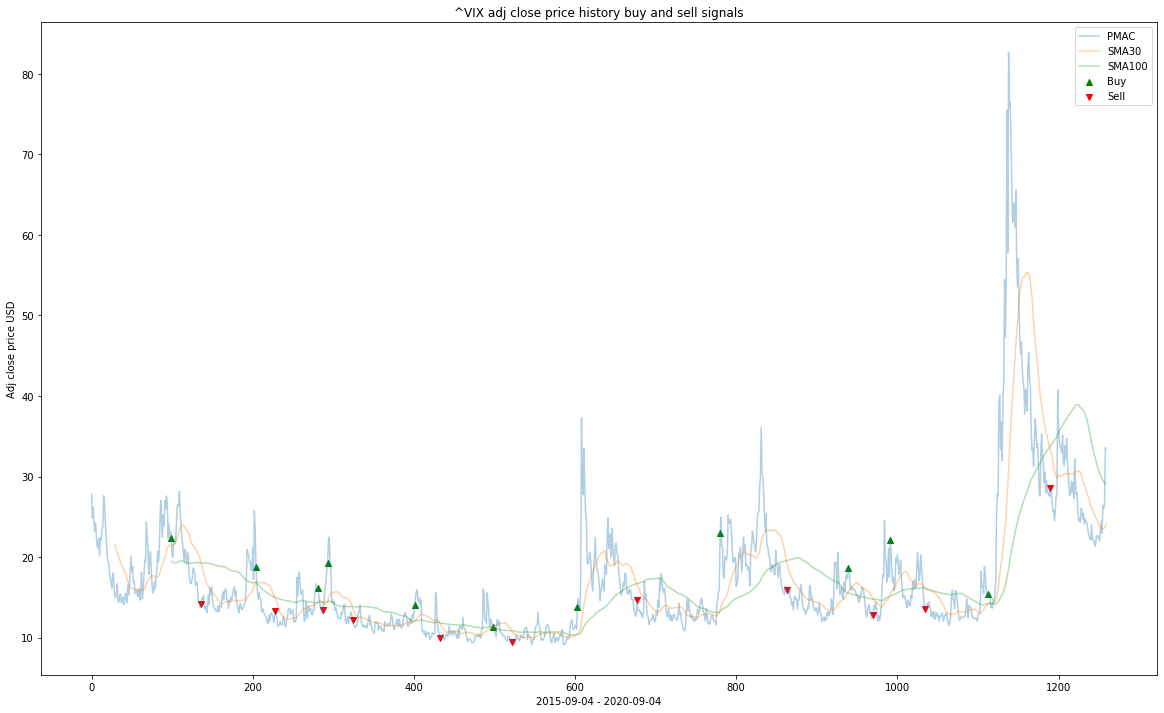

            buy_signal_price  sell_signal_price
Date                                           
2016-01-28         22.420000                NaN
2016-03-22               NaN              14.17
2016-06-28         18.750000                NaN
2016-08-02               NaN              13.37
2016-10-17         16.209999                NaN
2016-10-25               NaN              13.46
2016-11-02         19.320000                NaN
2016-12-16               NaN              12.20
2017-04-10         14.050000                NaN
2017-05-25               NaN               9.99
2017-08-28         11.320000                NaN
2017-10-02               NaN               9.45
2018-01-29         13.840000                NaN
2018-05-15               NaN              14.63
2018-10-10         22.959999                NaN
2019-02-11               NaN              15.97
2019-05-31         18.709999                NaN
2019-07-16               NaN              12.86
2019-08-14         22.100000            

In [84]:
chart('^VIX')

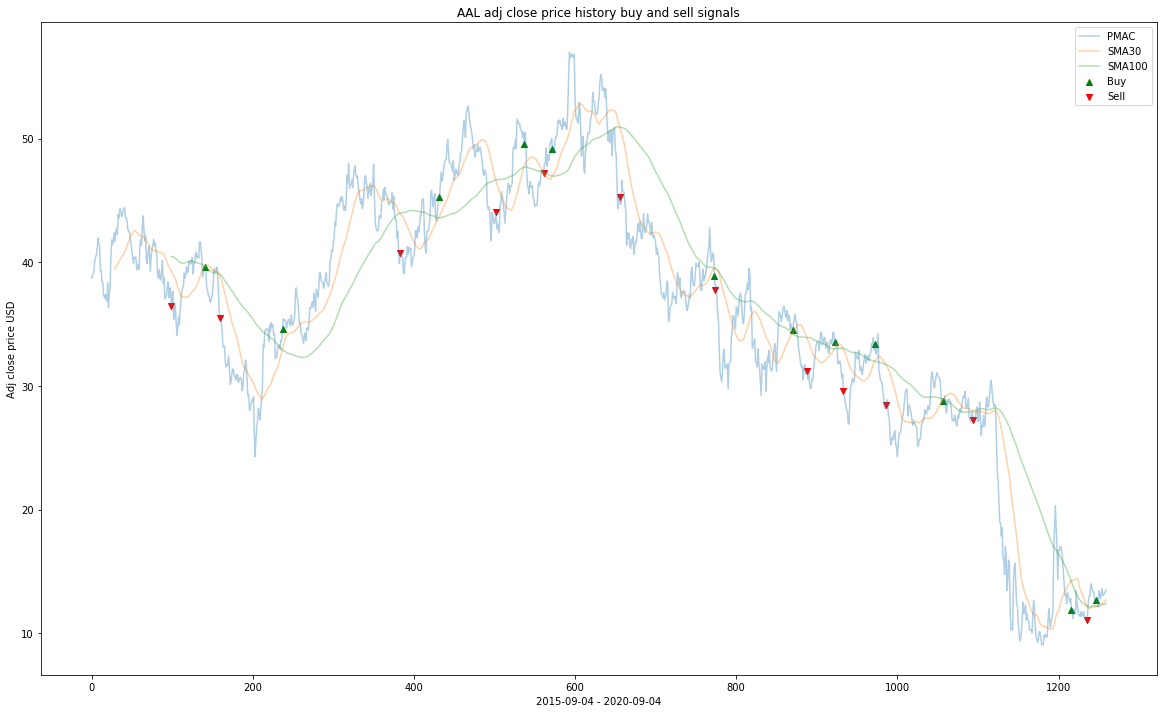

            buy_signal_price  sell_signal_price
Date                                           
2016-01-28               NaN          36.448322
2016-03-30         39.652512                NaN
2016-04-25               NaN          35.455364
2016-08-15         34.575081                NaN
2017-03-15               NaN          40.763432
2017-05-23         45.286705                NaN
2017-09-01               NaN          44.065636
2017-10-23         49.579914                NaN
2017-11-27               NaN          47.193333
2017-12-12         49.191406                NaN
2018-04-16               NaN          45.311485
2018-10-01         38.872402                NaN
2018-10-02               NaN          37.783073
2019-02-21         34.517223                NaN
2019-03-19               NaN          31.172075
2019-05-07         33.557953                NaN
2019-05-22               NaN          29.609373
2019-07-18         33.389717                NaN
2019-08-07               NaN          28

In [85]:
chart('AAL')

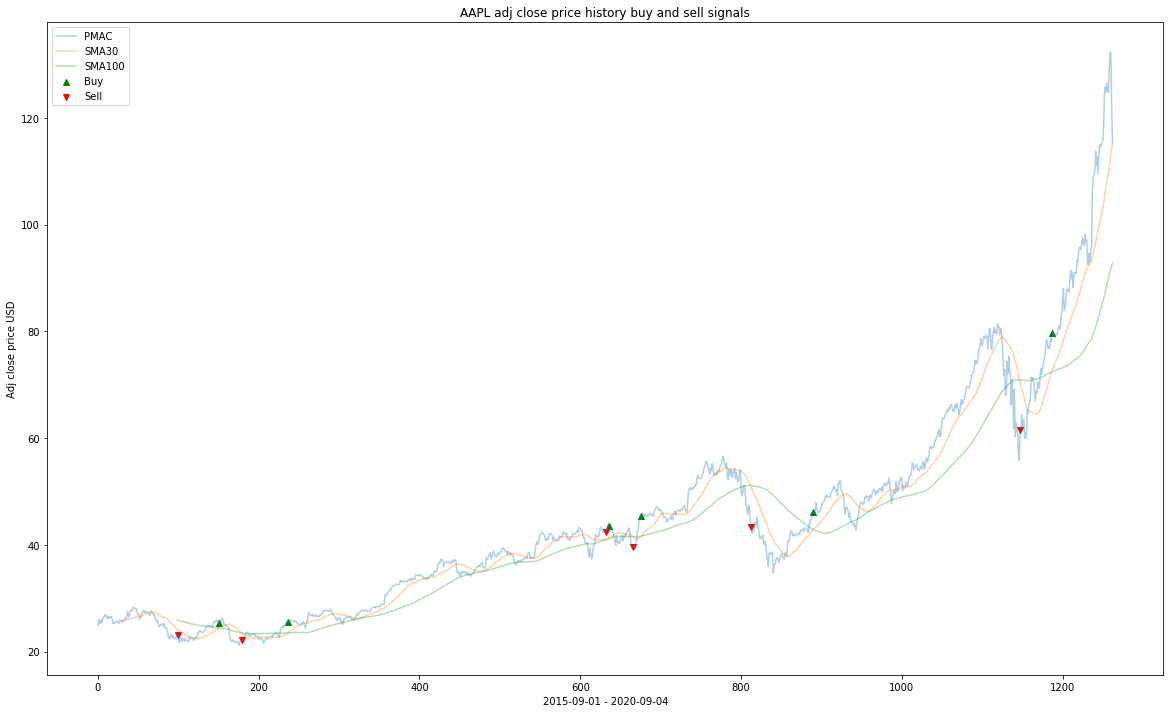

            buy_signal_price  sell_signal_price
Date                                           
2016-01-25               NaN          23.071817
2016-04-08         25.347818                NaN
2016-05-18               NaN          22.192921
2016-08-10         25.484562                NaN
2018-03-07               NaN          42.353111
2018-03-13         43.548473                NaN
2018-04-25               NaN          39.599415
2018-05-09         45.336678                NaN
2018-11-20               NaN          43.291397
2019-03-18         46.189163                NaN
2020-03-24               NaN          61.442596
2020-05-20         79.663872                NaN


In [86]:
chart('AAPL')

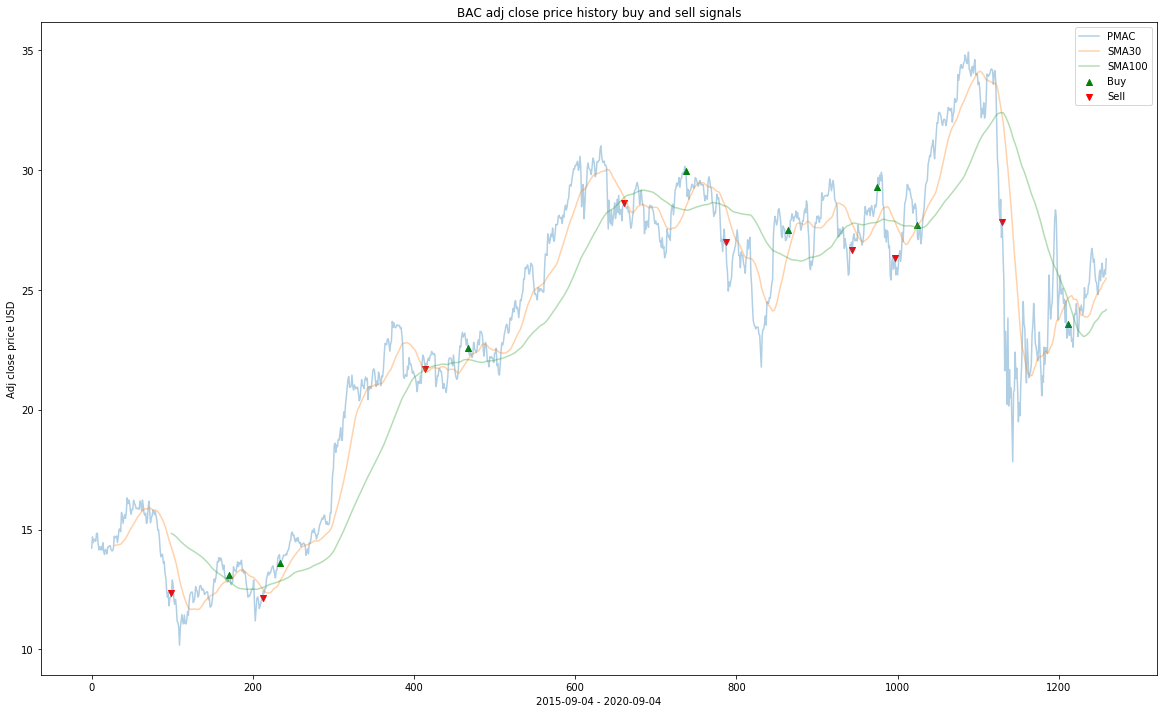

            buy_signal_price  sell_signal_price
Date                                           
2016-01-28               NaN          12.338641
2016-05-10         13.090466                NaN
2016-07-11               NaN          12.133677
2016-08-10         13.603313                NaN
2017-04-28               NaN          21.683887
2017-07-14         22.566025                NaN
2018-04-23               NaN          28.633778
2018-08-09         29.964523                NaN
2018-10-19               NaN          26.984097
2019-02-12         27.489416                NaN
2019-06-07               NaN          26.655891
2019-07-23         29.289530                NaN
2019-08-22               NaN          26.326687
2019-10-01         27.718493                NaN
2020-03-04               NaN          27.820826
2020-06-30         23.585703                NaN


In [87]:
chart('BAC')

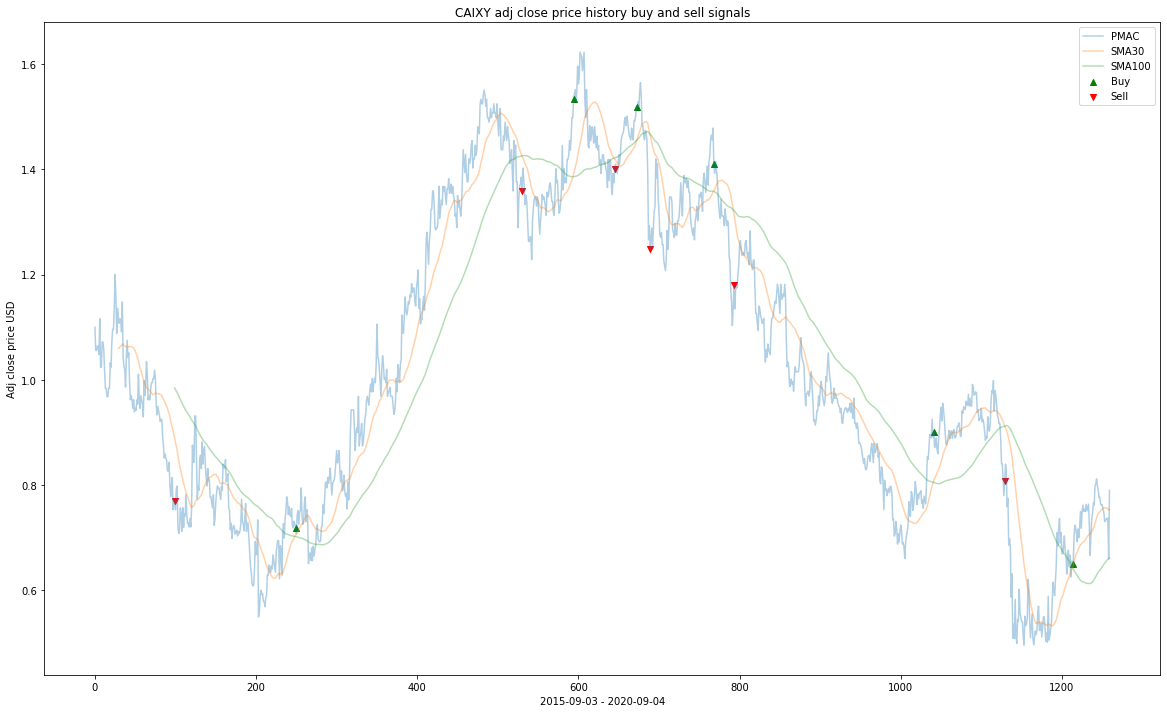

            buy_signal_price  sell_signal_price
Date                                           
2016-01-27               NaN           0.769707
2016-08-30          0.719165                NaN
2017-10-11               NaN           1.359138
2018-01-12          1.534298                NaN
2018-03-28               NaN           1.401267
2018-05-08          1.519478                NaN
2018-05-31               NaN           1.248143
2018-09-21          1.410944                NaN
2018-10-26               NaN           1.180309
2019-10-23          0.901049                NaN
2020-03-02               NaN           0.807675
2020-07-01          0.649700                NaN


In [88]:
chart('CAIXY')

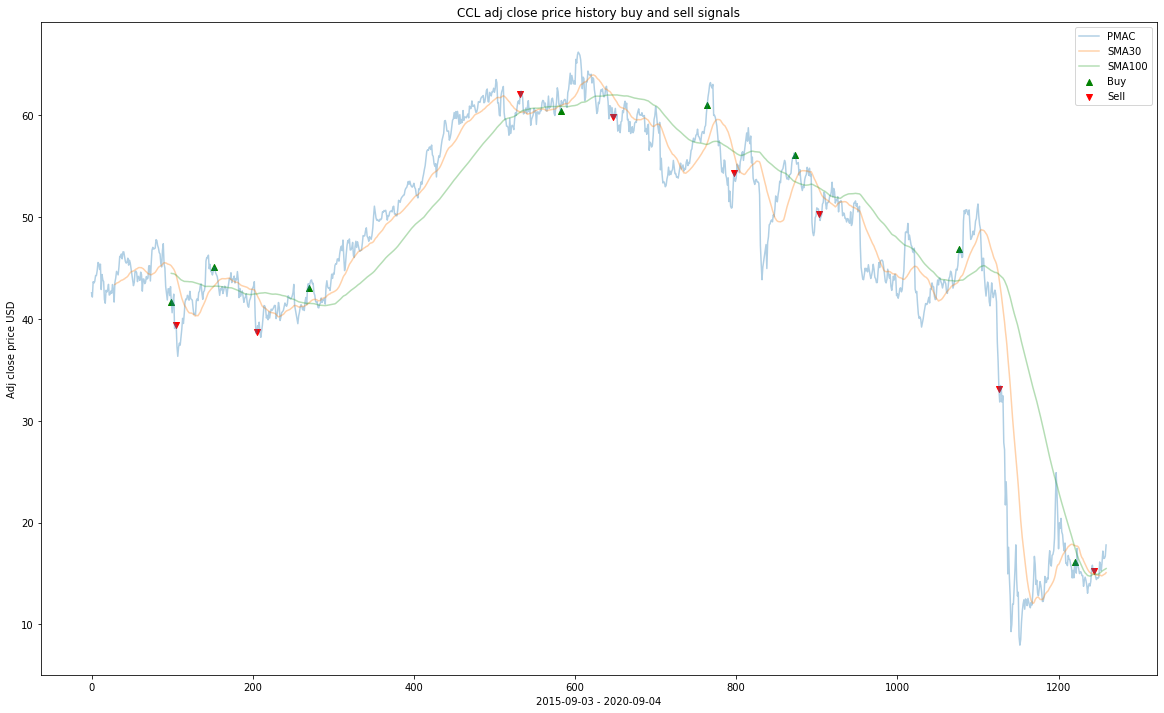

            buy_signal_price  sell_signal_price
Date                                           
2016-01-27         41.650021                NaN
2016-02-04               NaN          39.448334
2016-04-13         45.097031                NaN
2016-06-28               NaN          38.689545
2016-09-29         43.012405                NaN
2017-10-13               NaN          62.115742
2017-12-26         60.464722                NaN
2018-04-02               NaN          59.867020
2018-09-17         61.013233                NaN
2018-11-01               NaN          54.358437
2019-02-25         56.070881                NaN
2019-04-08               NaN          50.269455
2019-12-13         46.902588                NaN
2020-02-26               NaN          33.139999
2020-07-10         16.160000                NaN
2020-08-13               NaN          15.220000


In [89]:
chart('CCL')

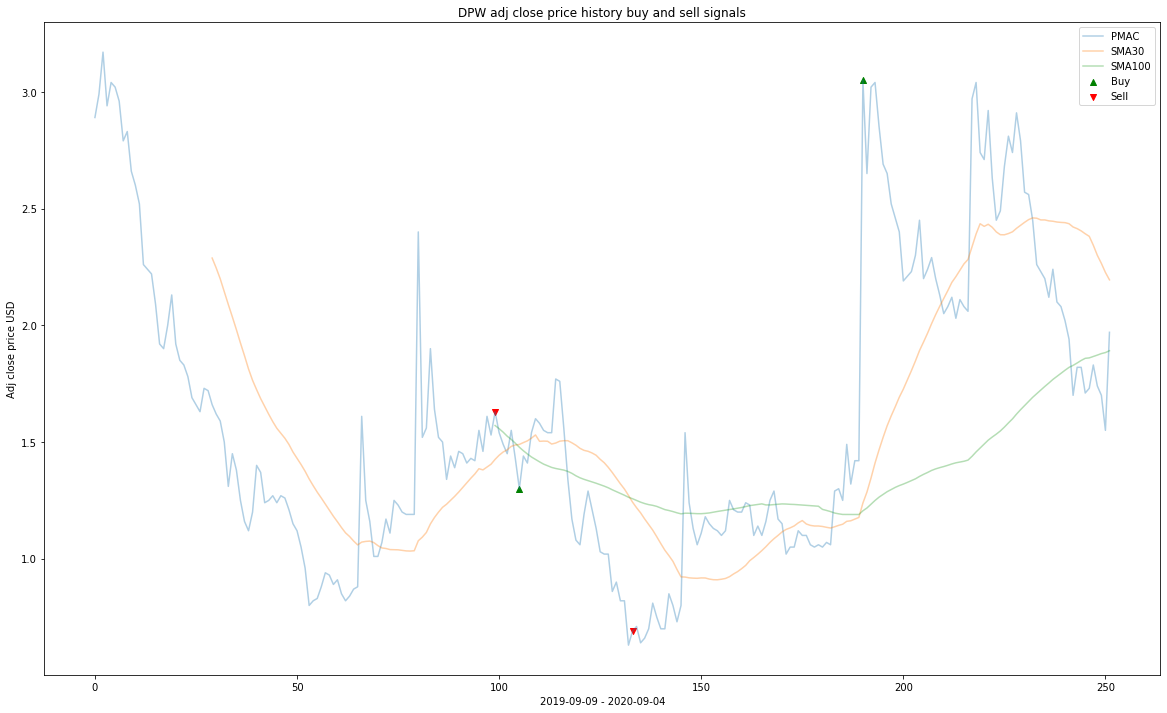

            buy_signal_price  sell_signal_price
Date                                           
2020-01-30               NaN               1.63
2020-02-07              1.30                NaN
2020-03-19               NaN               0.69
2020-06-10              3.05                NaN


In [110]:
chart('DPW')

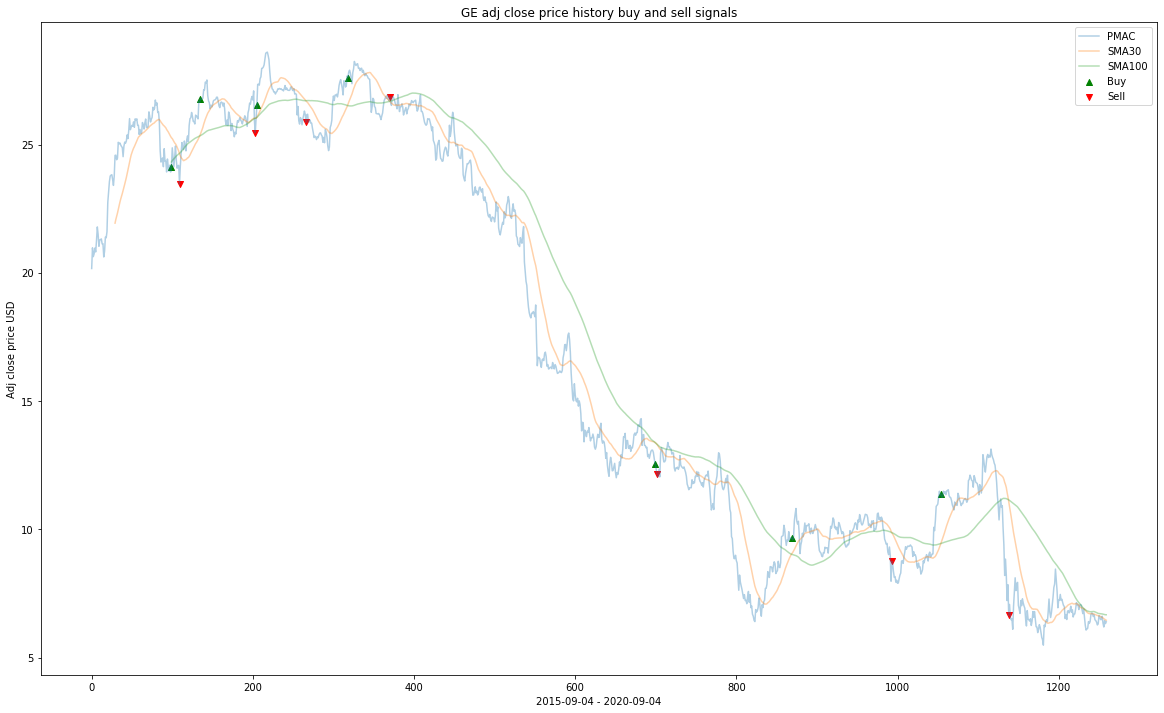

            buy_signal_price  sell_signal_price
Date                                           
2016-01-28         24.110607                NaN
2016-02-11               NaN          23.461050
2016-03-21         26.793402                NaN
2016-06-27               NaN          25.467154
2016-06-29         26.535528                NaN
2016-09-26               NaN          25.866571
2016-12-08         27.609108                NaN
2017-02-24               NaN          26.863792
2018-06-15         12.562900                NaN
2018-06-20               NaN          12.166176
2019-02-20          9.648636                NaN
2019-08-16               NaN           8.750731
2019-11-12         11.381272                NaN
2020-03-16               NaN           6.650030


In [91]:
chart('GE')

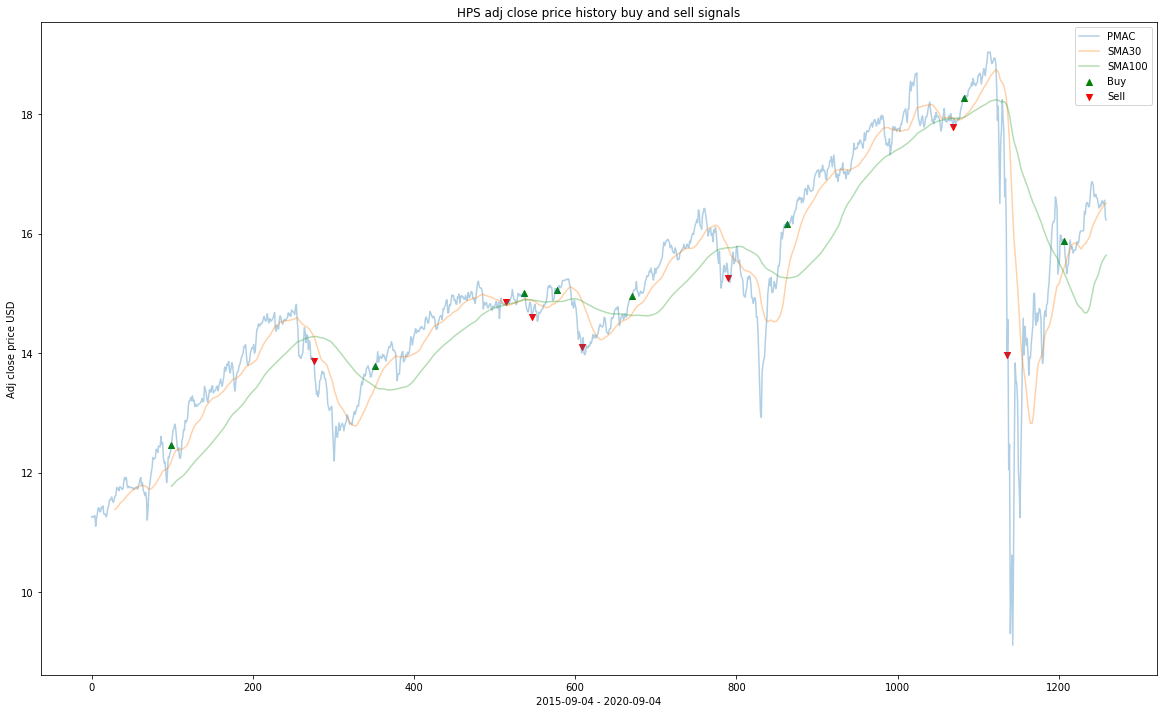

            buy_signal_price  sell_signal_price
Date                                           
2016-01-28         12.464716                NaN
2016-10-10               NaN          13.862386
2017-01-30         13.783689                NaN
2017-09-20               NaN          14.852678
2017-10-20         15.014085                NaN
2017-11-03               NaN          14.613916
2017-12-20         15.050230                NaN
2018-02-06               NaN          14.103805
2018-05-04         14.961349                NaN
2018-10-24               NaN          15.263136
2019-02-11         16.165186                NaN
2019-12-04               NaN          17.792633
2019-12-24         18.276083                NaN
2020-03-12               NaN          13.972542
2020-06-22         15.884970                NaN


In [92]:
chart('HPS')

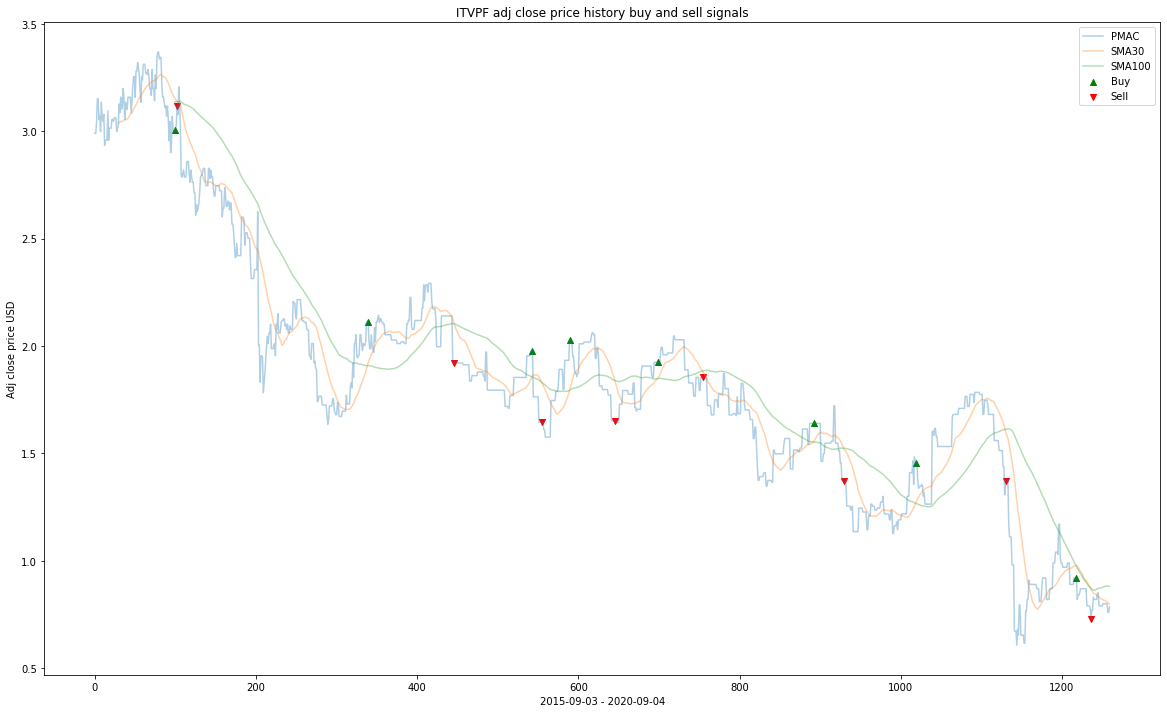

            buy_signal_price  sell_signal_price
Date                                           
2016-01-27          3.004698                NaN
2016-02-01               NaN           3.117778
2017-01-09          2.110518                NaN
2017-06-13               NaN           1.920951
2017-10-30          1.976117                NaN
2017-11-15               NaN           1.643924
2018-01-08          2.027223                NaN
2018-03-29               NaN           1.652442
2018-06-14          1.923945                NaN
2018-08-31               NaN           1.853983
2019-03-22          1.640072                NaN
2019-05-16               NaN           1.373681
2019-09-23          1.456102                NaN
2020-03-03               NaN           1.373195
2020-07-08          0.920000                NaN
2020-08-03               NaN           0.730000


In [93]:
chart('ITVPF')

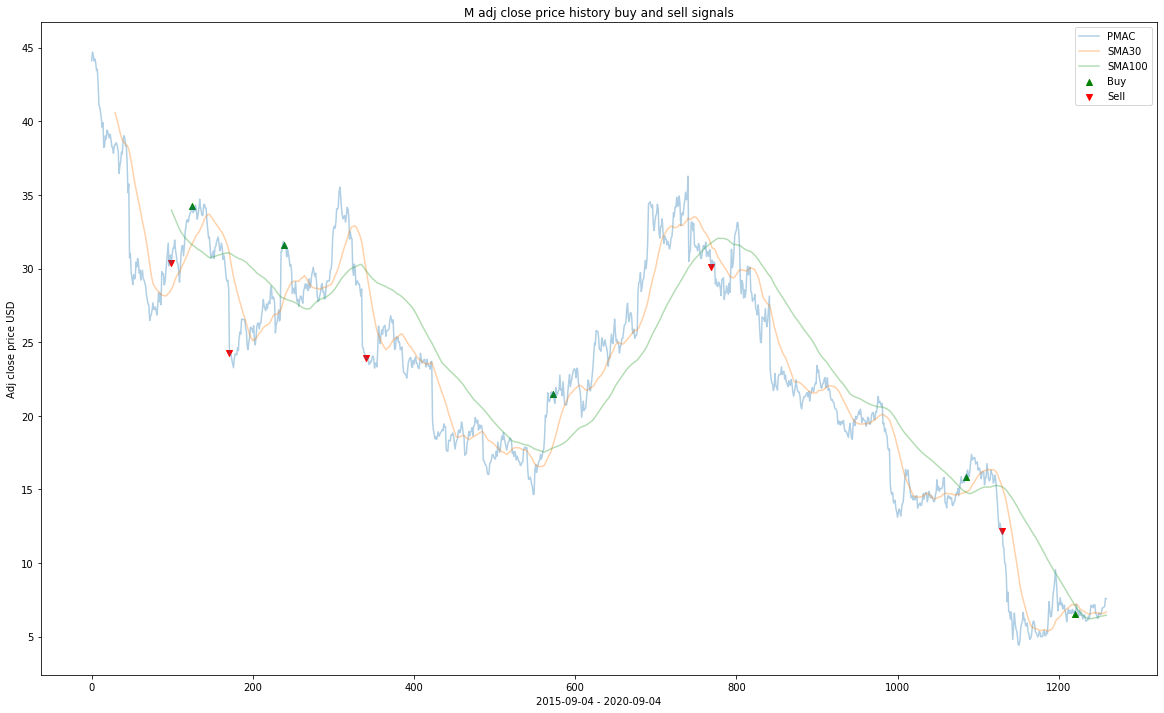

            buy_signal_price  sell_signal_price
Date                                           
2016-01-28               NaN          30.365000
2016-03-07         34.240238                NaN
2016-05-11               NaN          24.277941
2016-08-17         31.623369                NaN
2017-01-12               NaN          23.935656
2017-12-12         21.466820                NaN
2018-09-25               NaN          30.134163
2019-12-27         15.852384                NaN
2020-03-04               NaN          12.155734
2020-07-13          6.570000                NaN


In [94]:
chart('M')

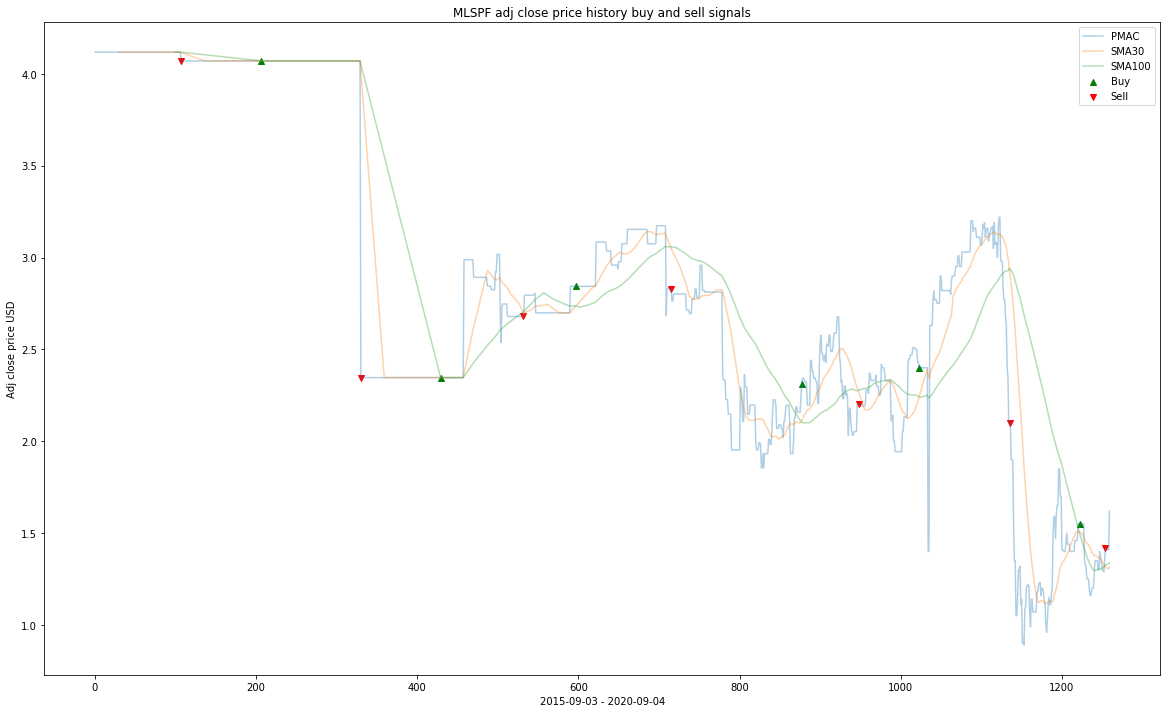

            buy_signal_price  sell_signal_price
Date                                           
2016-02-08               NaN           4.070116
2016-06-29          4.070116                NaN
2016-12-23               NaN           2.346302
2017-05-18          2.346302                NaN
2017-10-12               NaN           2.679256
2018-01-18          2.843095                NaN
2018-07-09               NaN           2.831108
2019-03-01          2.313699                NaN
2019-06-12               NaN           2.201126
2019-09-27          2.400000                NaN
2020-03-10               NaN           2.100000
2020-07-14          1.550000                NaN
2020-08-27               NaN           1.420000


In [95]:
chart('MLSPF')

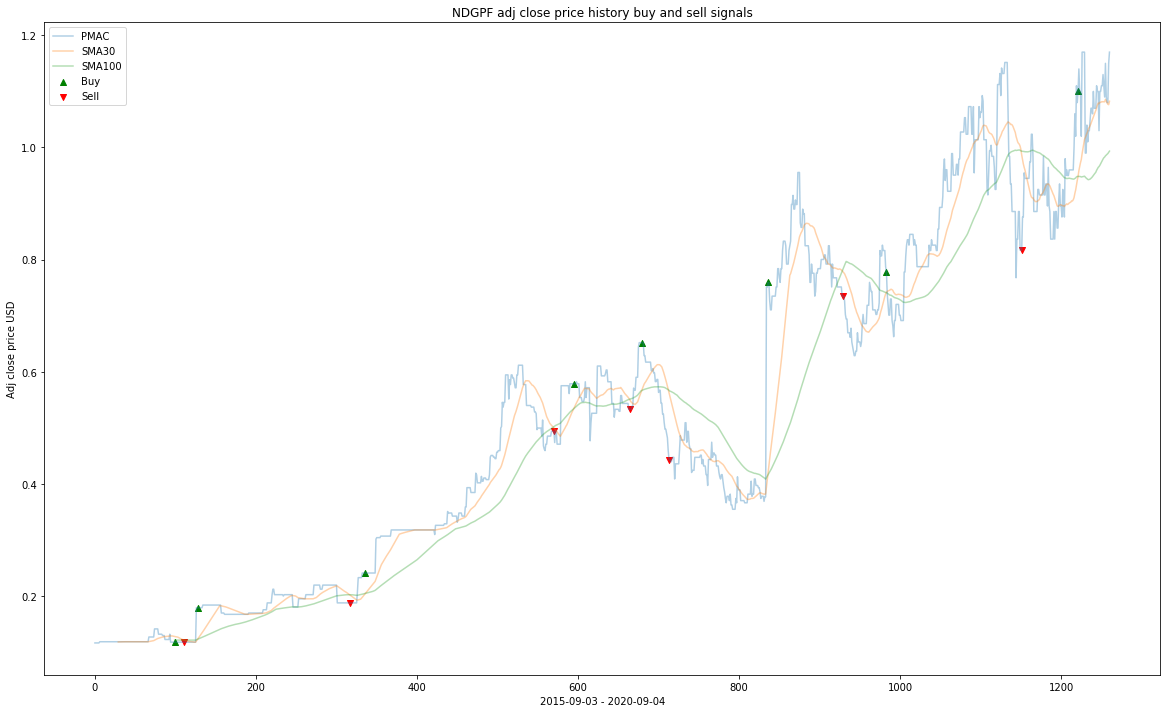

            buy_signal_price  sell_signal_price
Date                                           
2016-01-27          0.118084                NaN
2016-02-12               NaN           0.118084
2016-03-09          0.179487                NaN
2016-12-06               NaN           0.188066
2017-01-04          0.241337                NaN
2017-12-07               NaN           0.494035
2018-01-16          0.578780                NaN
2018-04-25               NaN           0.533179
2018-05-16          0.652054                NaN
2018-07-05               NaN           0.443706
2018-12-31          0.759488                NaN
2019-05-15               NaN           0.734989
2019-08-01          0.777886                NaN
2020-04-01               NaN           0.816944
2020-07-13          1.100000                NaN


In [96]:
chart('NDGPF')

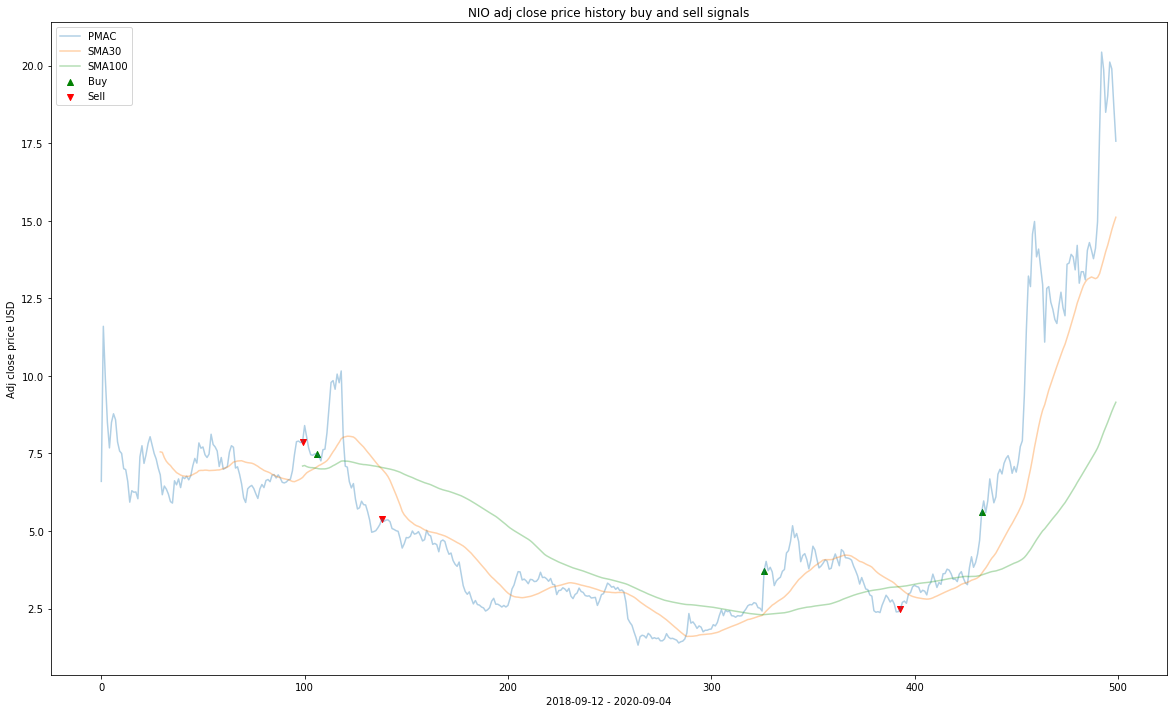

            buy_signal_price  sell_signal_price
Date                                           
2019-02-05               NaN               7.88
2019-02-14              7.48                NaN
2019-04-02               NaN               5.39
2019-12-30              3.72                NaN
2020-04-06               NaN               2.47
2020-06-03              5.60                NaN


In [97]:
chart('NIO')

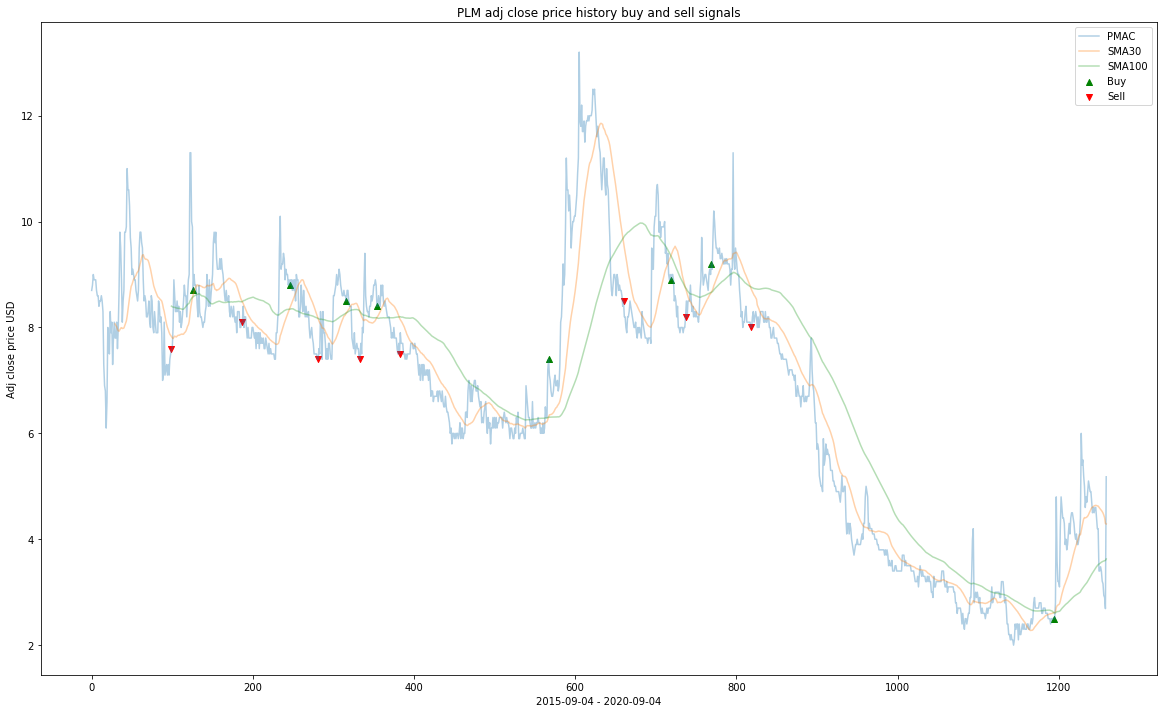

            buy_signal_price  sell_signal_price
Date                                           
2016-01-28               NaN                7.6
2016-03-08               8.7                NaN
2016-06-03               NaN                8.1
2016-08-26               8.8                NaN
2016-10-17               NaN                7.4
2016-12-06               8.5                NaN
2016-12-30               NaN                7.4
2017-02-01               8.4                NaN
2017-03-14               NaN                7.5
2017-12-05               7.4                NaN
2018-04-20               NaN                8.5
2018-07-16               8.9                NaN
2018-08-09               NaN                8.2
2018-09-25               9.2                NaN
2018-12-04               NaN                8.0
2020-06-04               2.5                NaN


In [98]:
chart('PLM')

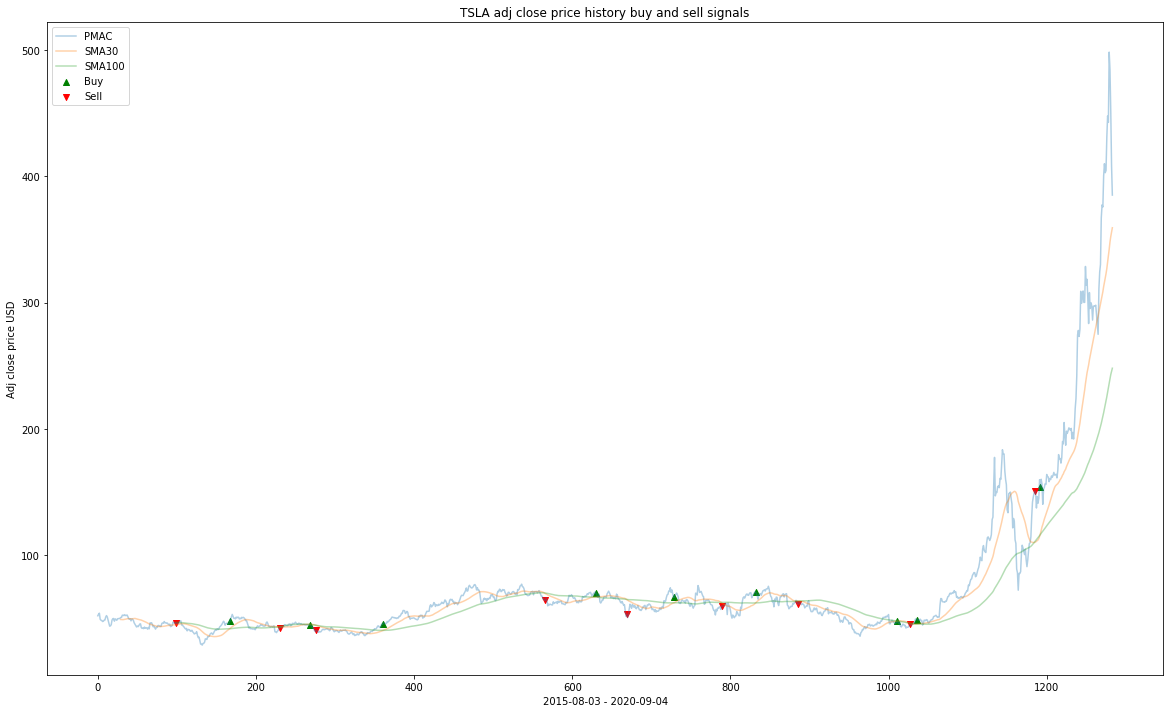

            buy_signal_price  sell_signal_price
Date                                           
2015-12-22               NaN          45.990002
2016-04-01         47.518002                NaN
2016-06-30               NaN          42.456001
2016-08-24         44.523998                NaN
2016-09-06               NaN          40.566002
2017-01-06         45.801998                NaN
2017-10-27               NaN          64.174004
2018-02-01         69.849998                NaN
2018-03-29               NaN          53.226002
2018-06-25         66.601997                NaN
2018-09-19               NaN          59.804001
2018-11-19         70.694000                NaN
2019-02-08               NaN          61.160000
2019-08-08         47.660000                NaN
2019-08-30               NaN          45.122002
2019-09-13         49.040001                NaN
2020-04-17               NaN         150.778000
2020-04-28        153.824005                NaN


In [99]:
chart('TSLA')

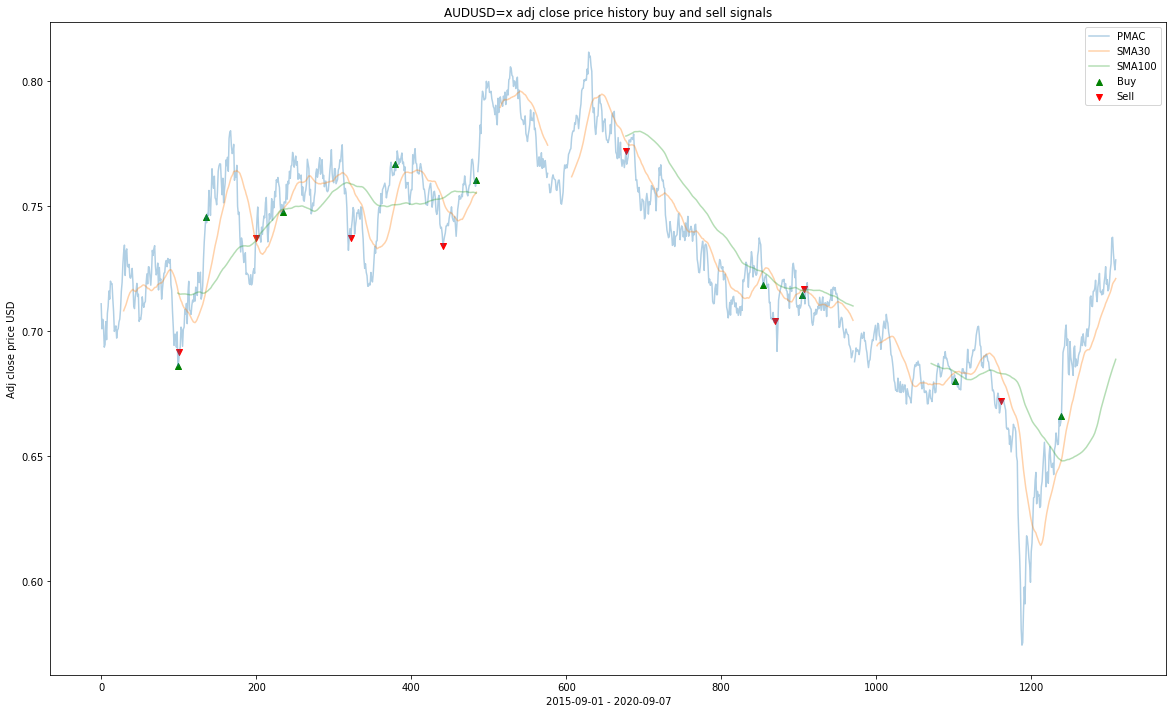

            buy_signal_price  sell_signal_price
Date                                           
2016-01-18          0.686106                NaN
2016-01-20               NaN           0.691706
2016-03-08          0.745823                NaN
2016-06-07               NaN           0.737354
2016-07-26          0.747608                NaN
2016-11-24               NaN           0.737463
2017-02-13          0.767012                NaN
2017-05-10               NaN           0.734241
2017-07-10          0.760514                NaN
2018-04-05               NaN           0.771998
2018-12-10          0.718494                NaN
2019-01-01               NaN           0.704176
2019-02-18          0.714541                NaN
2019-02-21               NaN           0.717000
2019-11-21          0.679897                NaN
2020-02-12               NaN           0.672102
2020-06-01          0.665978                NaN


In [100]:
chart('AUDUSD=x')

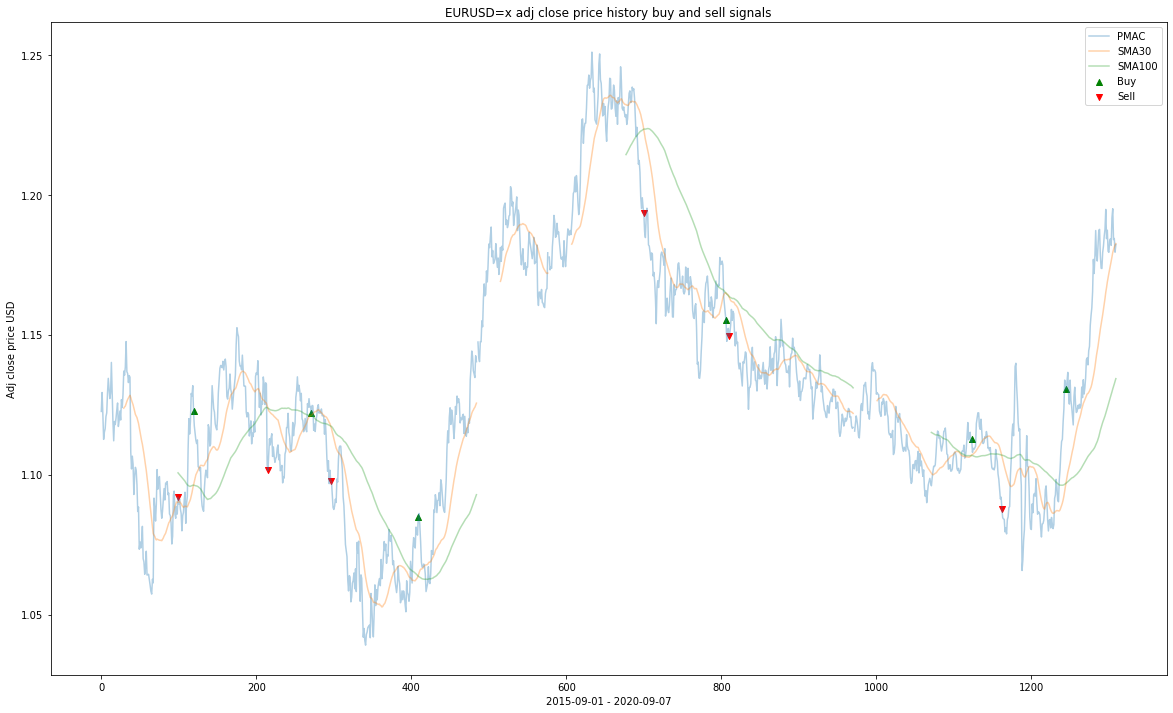

            buy_signal_price  sell_signal_price
Date                                           
2016-01-18               NaN           1.092001
2016-02-15          1.122599                NaN
2016-06-28               NaN           1.101503
2016-09-14          1.121869                NaN
2016-10-19               NaN           1.097695
2017-03-27          1.084952                NaN
2018-05-08               NaN           1.193374
2018-10-03          1.155175                NaN
2018-10-09               NaN           1.149412
2019-12-20          1.112595                NaN
2020-02-13               NaN           1.087595
2020-06-09          1.130557                NaN


In [101]:
chart('EURUSD=x')

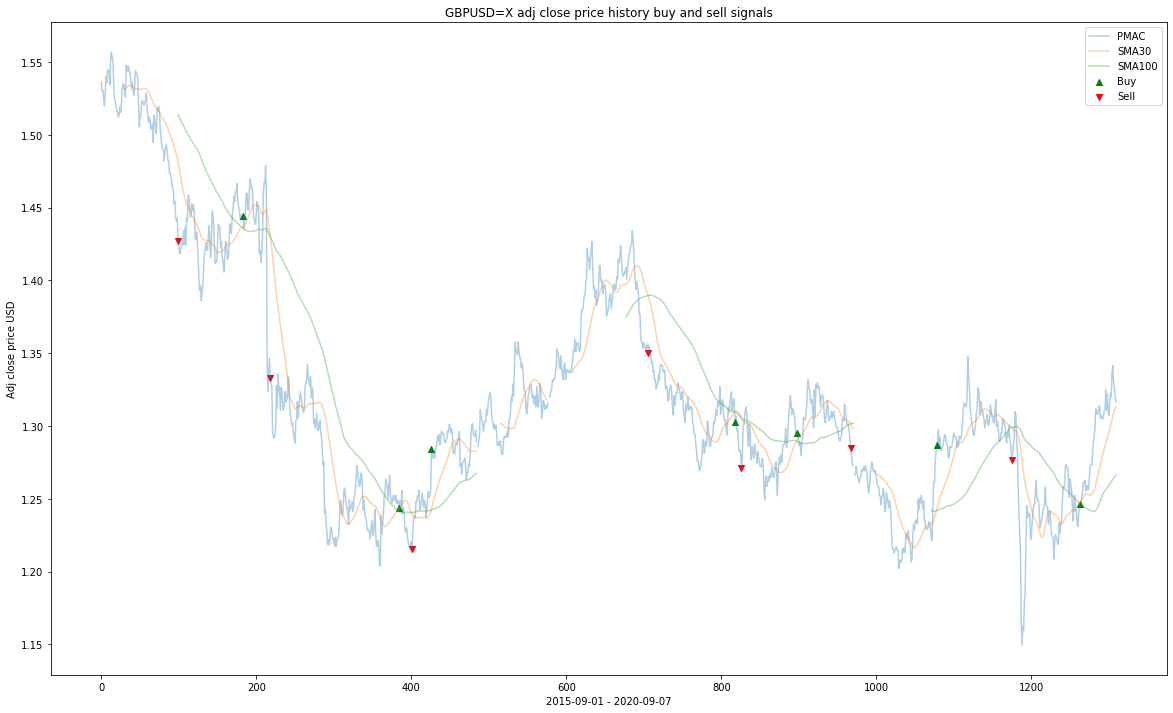

            buy_signal_price  sell_signal_price
Date                                           
2016-01-18               NaN           1.427409
2016-05-13          1.444523                NaN
2016-07-01               NaN           1.332871
2017-02-20          1.243394                NaN
2017-03-15               NaN           1.215746
2017-04-19          1.284456                NaN
2018-05-16               NaN           1.350020
2018-10-19          1.302423                NaN
2018-10-31               NaN           1.270890
2019-02-08          1.294917                NaN
2019-05-16               NaN           1.284752
2019-10-18          1.286860                NaN
2020-03-03               NaN           1.276715
2020-07-03          1.246640                NaN


In [102]:
chart('GBPUSD=X')

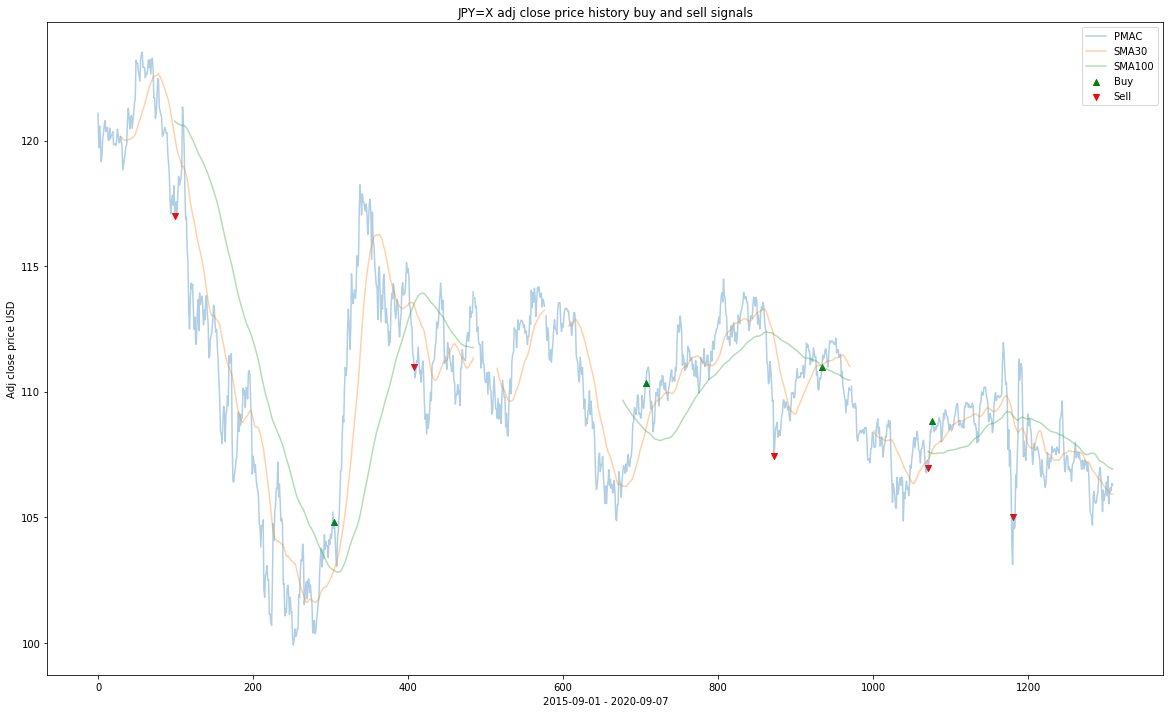

            buy_signal_price  sell_signal_price
Date                                           
2016-01-18               NaN         116.989998
2016-11-01        104.820000                NaN
2017-03-24               NaN         111.003998
2018-05-17        110.359001                NaN
2019-01-03               NaN         107.441002
2019-04-01        110.995003                NaN
2019-10-09               NaN         106.960999
2019-10-16        108.817001                NaN
2020-03-11               NaN         105.026001


In [103]:
chart('JPY=X')

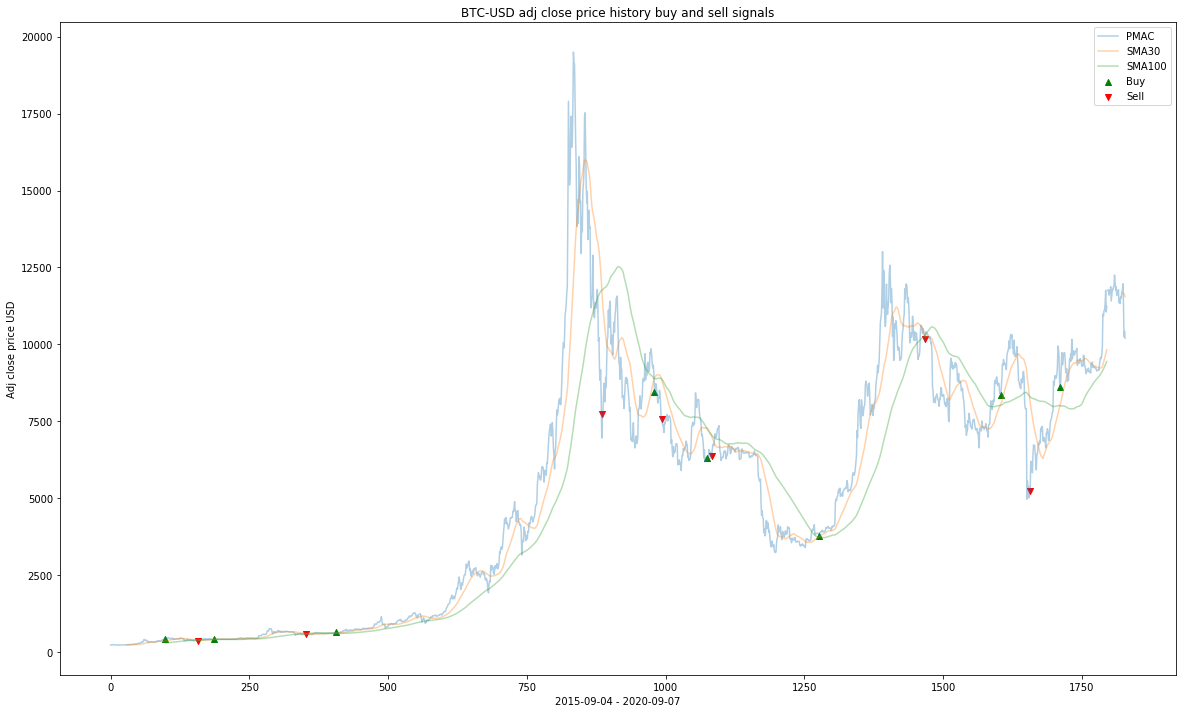

            buy_signal_price  sell_signal_price
Date                                           
2015-12-12        434.997009                NaN
2016-02-08               NaN         373.446991
2016-03-08        413.971985                NaN
2016-08-21               NaN         581.307983
2016-10-15        638.645996                NaN
2018-02-06               NaN        7754.000000
2018-05-11       8441.490234                NaN
2018-05-24               NaN        7587.339844
2018-08-13       6297.569824                NaN
2018-08-22               NaN        6376.709961
2019-03-04       3761.557129                NaN
2019-09-11               NaN       10178.372070
2020-01-25       8367.847656                NaN
2020-03-17               NaN        5225.629395
2020-05-11       8601.795898                NaN


In [104]:
chart('BTC-USD')

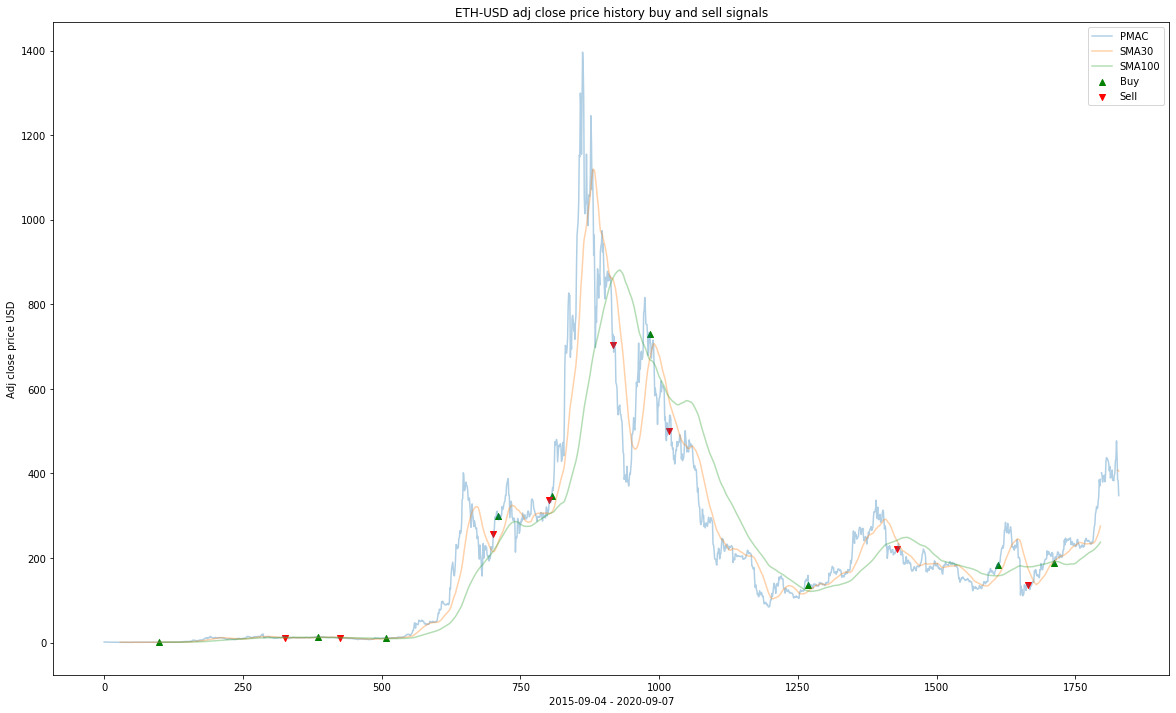

            buy_signal_price  sell_signal_price
Date                                           
2015-12-12          0.976973                NaN
2016-07-26               NaN          11.989500
2016-09-23         13.331300                NaN
2016-11-02               NaN          10.752600
2017-01-24         10.632500                NaN
2017-08-05               NaN         256.506989
2017-08-14        300.096985                NaN
2017-11-14               NaN         337.631012
2017-11-18        347.612000                NaN
2018-03-08               NaN         704.596008
2018-05-14        730.549011                NaN
2018-06-17               NaN         500.447998
2019-02-24        135.852661                NaN
2019-08-03               NaN         222.490341
2020-02-01        183.673950                NaN
2020-03-25               NaN         136.195892
2020-05-12        189.312500                NaN


In [105]:
chart('ETH-USD')

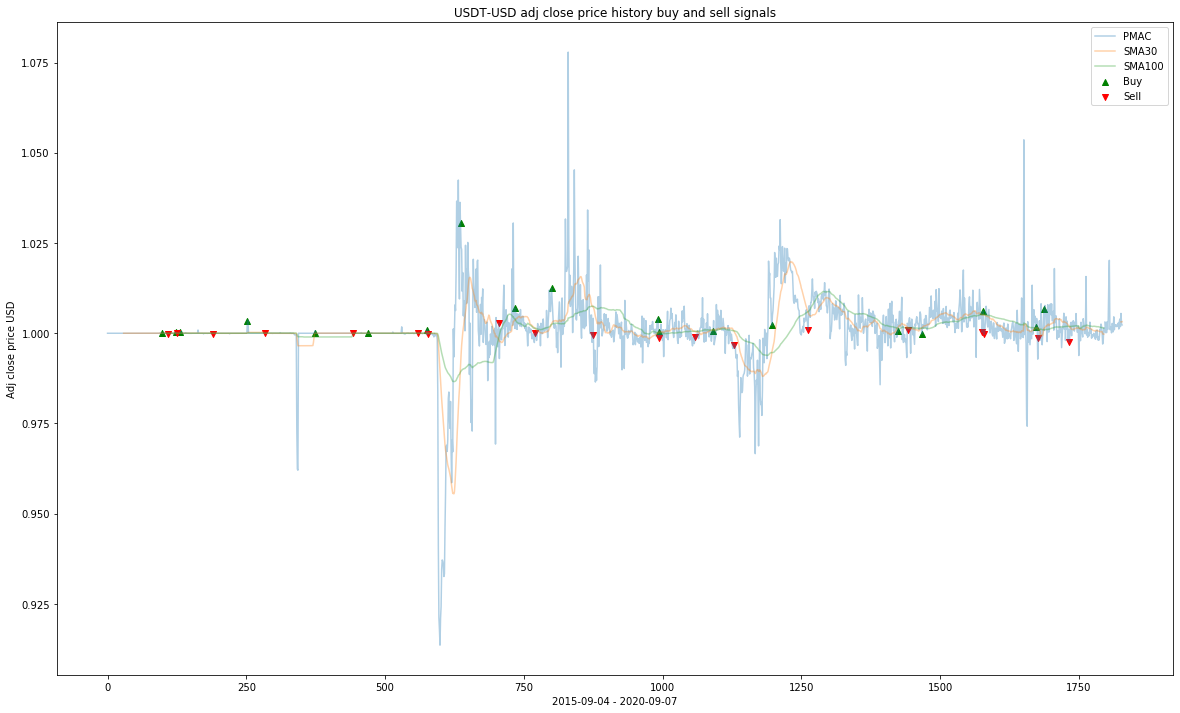

            buy_signal_price  sell_signal_price
Date                                           
2015-12-12          1.000000                NaN
2015-12-22               NaN           0.999801
2016-01-05          1.000250                NaN
2016-01-07               NaN           1.000000
2016-01-13          1.000450                NaN
2016-03-12               NaN           0.999895
2016-05-13          1.003260                NaN
2016-06-13               NaN           1.000000
2016-09-11          1.000000                NaN
2016-11-20               NaN           1.000000
2016-12-17          1.000030                NaN
2017-03-17               NaN           1.000030
2017-04-02          1.000950                NaN
2017-04-03               NaN           0.999752
2017-06-01          1.030570                NaN
2017-08-09               NaN           1.002860
2017-09-08          1.006890                NaN
2017-10-13               NaN           1.000050
2017-11-12          1.012470            

In [106]:
chart('USDT-USD')